# TF-IDF and K-Means Clustering
### Applied to the titles of all listings combined

In [1]:
# import libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import silhouette_score

In [2]:
# import libraries for algorithm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# import the dataset
df = pd.read_csv('data/titles-combined-cleaned.csv')

In [4]:
# remove the punctuation
df['title_string'] = df['title_listing'].apply(lambda x: re.sub("[^A-Za-z]+", " ", x))

In [5]:
# change the dataframe column to a series to use with the model
title = df['title_string']

TD-IDF Vectorization

In [6]:
# initialize the vectorizer
vector = TfidfVectorizer(sublinear_tf=True, min_df=0.005, max_df=0.4)

In [7]:
# Apply vectorizer and save array of vectors in V
V = vector.fit_transform(title)

In [8]:
V.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.38050505, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Apply K-means algorithm

### Find optimal number of clusters k Using the Elbow Method
Source: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [9]:
Sum_of_squared_distances = []
K = range(2,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(V)
    Sum_of_squared_distances.append(km.inertia_)

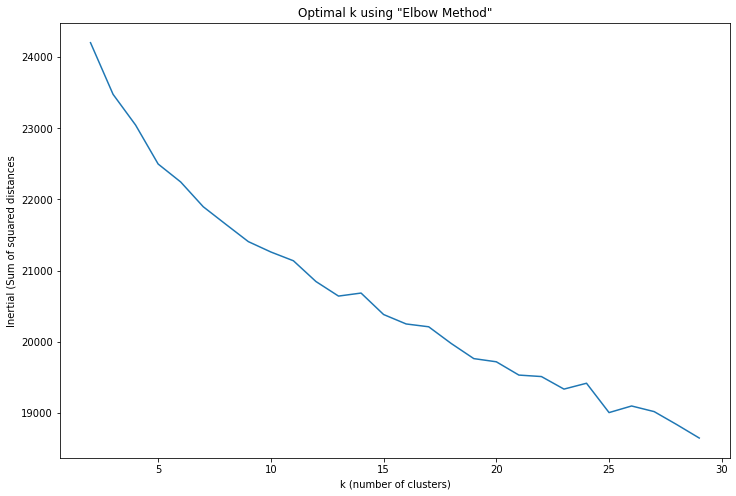

In [10]:
# plot the k values vs the inertia values
plt.figure(figsize=(12, 8))

sns.lineplot(x=K, y=Sum_of_squared_distances)

plt.xlabel('k (number of clusters)')
plt.ylabel('Inertial (Sum of squared distances')
plt.title('Optimal k using "Elbow Method"')

plt.show()

In [11]:
# calculate the all silhouette scores for the range of values indicated by the elbow method
# NOTE: the range for K cannot include 1
silhouette_scores = []
K = range(3,25)
for k in K:
    km = KMeans(n_clusters=k, random_state = 42)
    km = km.fit(V)
    silhouette_scores.append(silhouette_score(V, km.labels_, metric='euclidean'))

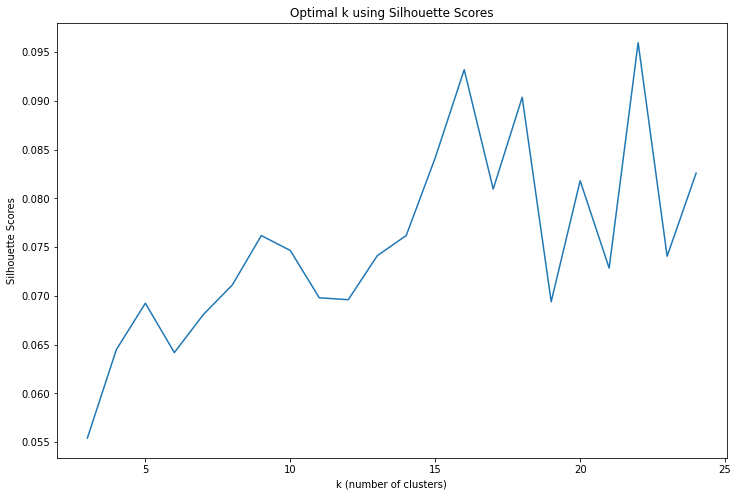

In [12]:
# plot the silhouette scores
plt.figure(figsize=(12, 8))

sns.lineplot(x=K, y=silhouette_scores)

plt.xlabel('k (number of clusters)')
plt.ylabel('Silhouette Scores')
plt.title('Optimal k using Silhouette Scores')

plt.show()

### Use the best numner of clusters as indicated by previous section to initialize k-means below

In [13]:
# intialize k-means
kmeans = KMeans(n_clusters=9, random_state = 42)

In [14]:
# fit the model to the vectors
kmeans.fit(V)

KMeans(n_clusters=9, random_state=42)

In [15]:
# store cluster labels in a variable
clusters = kmeans.labels_

#look at the cluster labels
[c for c in clusters][:20]

[0, 3, 4, 3, 0, 0, 0, 7, 0, 4, 0, 0, 4, 6, 4, 7, 4, 4, 4, 4]

In [16]:
# add clusters to the dataframe
df['cluster'] = clusters.tolist()

In [17]:
# calculate silhouette score for this individual k
score = silhouette_score(V, kmeans.labels_, metric='euclidean')
score

0.07617766136889353

In [21]:
# define a function that will find the top words for each cluster
def top_words(n):
    words_df = pd.DataFrame(V.todense()).groupby(clusters).mean()
    words = vector.get_feature_names()
    for i,r in words_df.iterrows():
        print('\nCluster {}'.format(i))
        print(', '.join([words[w] for w in np.argsort(r)[::-1][:n]]))

In [22]:
top_words(10)


Cluster 0
set, dish, blue, vintage, jar, white, green, gift, bowls, small

Cluster 1
pendant, earrings, charms, necklace, jewelry, jewellery, flowers, beads, green, blue

Cluster 2
mug, coffee, tea, blue, gift, large, cup, green, white, mugs

Cluster 3
pot, planter, bonsai, plant, succulent, hole, small, hanging, blue, flower

Cluster 4
bowl, serving, blue, soup, small, large, white, salad, dish, fruit

Cluster 5
plate, dinner, serving, set, dinnerware, plates, dish, tableware, gift, platter

Cluster 6
holder, candle, utensil, incense, dish, spoon, kitchen, ring, soap, rest

Cluster 7
vase, flower, bud, blue, vintage, small, white, decor, studio, home

Cluster 8
cup, coffee, mug, tea, espresso, tumbler, blue, white, gift, large


In [23]:
# Use top words to assign categories to the clusters
categories = {0:'Sets', 1:'Jewelry', 2:'Mug', 3:'Planter', 4:'Bowl', 5:'Plate', 6:'Holders', 7:'Vase',8:'Cup'}

In [24]:
# map the category names to the listings
df['category'] = df['cluster'].map(categories)

In [28]:
df[df['category'] == 'Mug'].head(10)

,Unnamed: 0,title_listing,title_string,cluster,xD,yD,category
65,65,"['seconds', 'sale', 'weather', 'mug', 'simply']",seconds sale weather mug simply,2,0.762851,0.109077,Mug
77,77,"['coffee', 'mug', 'u', 'shaped', 'regular', 'c...",coffee mug u shaped regular coffee mug mug ca...,2,0.484848,0.021158,Mug
81,81,"['beer', 'mug', 'straight', 'large', 'beer', '...",beer mug straight large beer mug extra large ...,2,0.339768,0.036488,Mug
82,82,"['coffee', 'mug', 'large', 'round', 'coffee', ...",coffee mug large round coffee mug mug latte m...,2,0.389147,0.264024,Mug
85,85,"['beer', 'mug', 'straight', 'medium', 'beer', ...",beer mug straight medium beer mug extra large...,2,0.326606,0.032501,Mug
91,91,"['coffee', 'mug', 'large', 'classic', 'coffee'...",coffee mug large classic coffee mug mug latte...,2,0.439751,0.301438,Mug
97,97,"['coffee', 'mug', 'medium', 'round', 'coffee',...",coffee mug medium round coffee mug mug cappuc...,2,0.440660,0.018469,Mug
98,98,"['coffee', 'mug', 'large', 'low', 'rounded', '...",coffee mug large low rounded coffee mug soup ...,2,0.372356,0.276247,Mug
119,119,"['coffee', 'mug', 'large', 'rounded', 'coffee'...",coffee mug large rounded coffee mug mug large...,2,0.597284,0.063006,Mug
121,121,"['coffee', 'mug', 'large', 'hourglass', 'shape...",coffee mug large hourglass shaped coffee mug ...,2,0.501947,0.045323,Mug


Dimension Reduction and Visualization

In [29]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)

# pass the vectors to the pca and store the vectors
vectorsPCA = pca.fit_transform(V.toarray())

# save the two dimensions
xD = vectorsPCA[:, 0]
yD = vectorsPCA[:, 1]

# add vectors and clusters to the dataframe
df['cluster'] = clusters
df['xD'] = xD
df['yD'] = yD

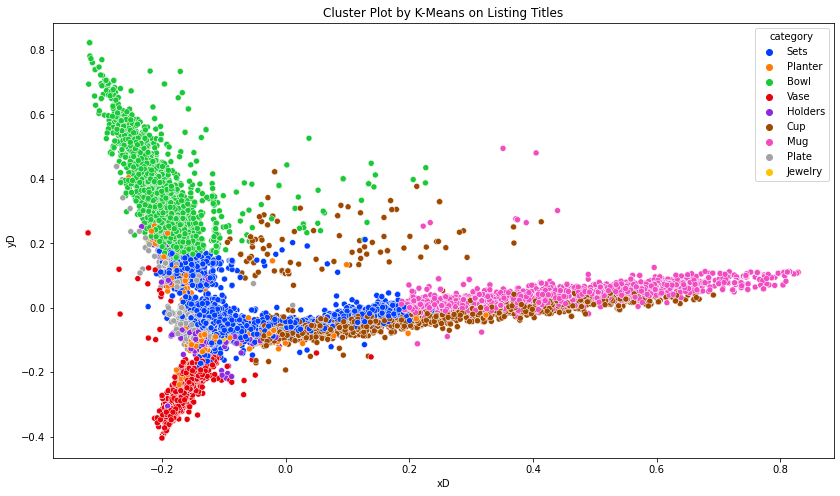

In [30]:
# plot the clusters
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x="xD", y="yD", hue='category', palette="bright")
plt.title('Cluster Plot by K-Means on Listing Titles')

plt.show()